In [13]:

%pip install numpy
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

Note: you may need to restart the kernel to use updated packages.



In [14]:
import numpy as np
import matplotlib.pyplot as plt

def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()




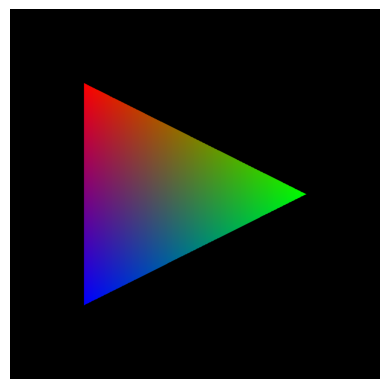

In [29]:
image_width = 1000
image_height = 1000
image = np.zeros((image_width, image_height, 3), dtype=np.uint8)

image_world_origin = [0,0]
image_world_width = 10
image_world_height = 10

pos_a = [2.0,2.0]
pos_b = [5.0,8.0]
pos_c = [8.0,2.0]

color_a = [255.0,0.0,0.0] # red
color_b = [0.0,255.0,0.0] # green
color_c = [0.0,0.0,255.0] # blue
color_background = [0.0,0.0,0.0]

vec_ab = np.array(pos_b) - np.array(pos_a)
vec_ac = np.array(pos_c) - np.array(pos_a)
vec_bc = np.array(pos_c) - np.array(pos_b)


def cross_product(a,b):
    return a[0]*b[1] - a[1]*b[0]

def dot_product(a,b):
    return a[0]*b[0] + a[1]*b[1]

def magnitude(a):
    return np.sqrt(a[0]**2 + a[1]**2)

def triangle_area(a,b,c):
    return 0.5 * cross_product(np.array(b) - np.array(a), np.array(c) - np.array(a))


def add_color_to_image(image, x, y, color):
    image[x,y] = color

def image_to_world(image_x, image_y):
    return [
        image_world_origin[0] + (image_x / image_width) * image_world_width,
        image_world_origin[1] + (image_y / image_height) * image_world_height
    ]

def world_to_image(world_x, world_y):
    return [
        int((world_x - image_world_origin[0]) / image_world_width * image_width),
        int((world_y - image_world_origin[1]) / image_world_height * image_height)
    ]


area_abc = triangle_area(pos_a, pos_b, pos_c)
for x in range(image_width):
    for y in range(image_height):
        pos_p = image_to_world(x,y)

        area_abp = triangle_area(pos_a, pos_b, pos_p)
        area_bcp = triangle_area(pos_b, pos_c, pos_p)
        area_cap = triangle_area(pos_c, pos_a, pos_p)

        alpha_a = area_bcp / area_abc
        alpha_b = area_cap / area_abc
        alpha_c = area_abp / area_abc

        color_p = alpha_a * np.array(color_a) + alpha_b * np.array(color_b) + alpha_c * np.array(color_c)


        if alpha_a >= 0 and alpha_b >= 0 and alpha_c >= 0:
            add_color_to_image(image, x, y, color_p.astype(np.uint8))
        else:
            add_color_to_image(image, x, y, color_background)

show_image(image)





